# Data Preprocessing

---



In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
print(df.shape)
df.head()

(37249, 2)


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [9]:
df.sample()['clean_comment'].values

array(['stuart binny would have defended this total '], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [11]:
df.isnull().sum()


,0
clean_comment,100
category,0


In [12]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [13]:
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


In [14]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

,0
clean_comment,0
category,0


In [15]:
df.duplicated().sum()

np.int64(350)

In [17]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [19]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [20]:
df = df[~(df['clean_comment'].str.strip() == '')]

What it does: This line filters out and removes all rows from your DataFrame df where the clean_comment column, after removing leading/trailing whitespace, is an empty string

In [23]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category


In [24]:
# Convert the 'clean_comment' column to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()

# Verify the transformation by displaying the first few rows
df.head()


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [25]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


this checks if there are any data that starts with an empty space and ends with an empty space. This needs to be removed or this will be treated as a one token

In [26]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [27]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [28]:
# Remove new line characters from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


# EDA

---



<Axes: xlabel='category', ylabel='count'>

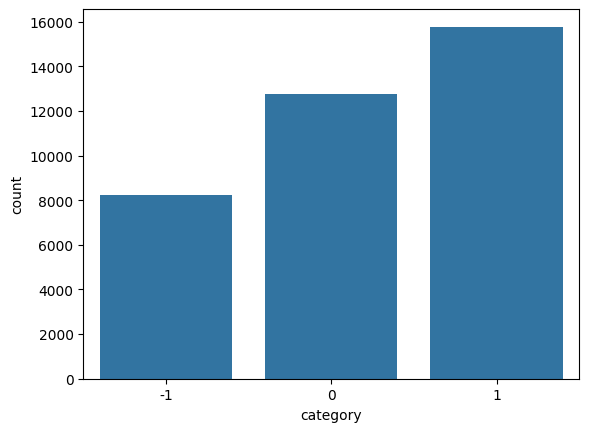

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="category")

the distribution of the data shown in the bar plot is imbalanced.

Here's why:

Category -1: Has a count of approximately 8,200.

Category 0: Has a count of approximately 12,800.

Category 1: Has a count of approximately 15,800.

There's a significant difference in the number of samples for each category, with Category 1 having nearly twice as many observations as Category -1. This uneven distribution indicates a class imbalance.

In [34]:
df['category'].value_counts(normalize=True).mul(100).round(2)


,proportion
category,
1,42.86
0,34.71
-1,22.42


In [35]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

This code is calculating the **number of words** in each `clean_comment` and storing that count in a new column called `word_count` in your DataFrame `df`.

Here's a breakdown:

* `df['clean_comment']`: This selects the `clean_comment` column from your DataFrame.
* `.apply(lambda x: ...)`: This applies a small, anonymous function (defined by `lambda x: ...`) to each individual value (`x`) in the `clean_comment` column.
* `x.split()`: Inside the `lambda` function, for each comment string `x`, this method splits the string into a list of words. By default, `split()` splits the string by whitespace.
    * For example, if `x` is "This is a comment", `x.split()` would return `['This', 'is', 'a', 'comment']`.
* `len(...)`: This function then calculates the length of the list of words, which gives you the total word count for that specific comment.
* `df['word_count'] = ...`: Finally, the calculated word count for each comment is assigned to a new column named `word_count` in your DataFrame `df`.

In [36]:
df.sample(5)

,clean_comment,category,word_count
29945,indian and even accept that this entire thing ...,1,313
9303,also operational nightmare for banks,0,5
37114,watch social media all the porky sympathizers ...,-1,33
31756,but still going vote for modi because here joh...,-1,33
32938,got killed while doing banned stuff train trac...,-1,18


In [37]:
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


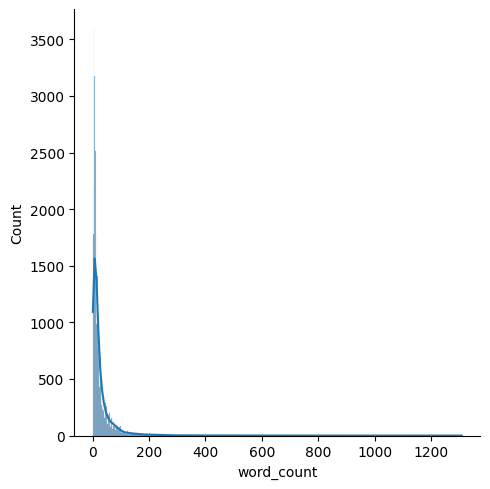

In [38]:
sns.displot(df['word_count'], kde=True)

This plot is a **distribution plot** of the `word_count` column, and it tells us about the distribution of comment lengths in terms of words.

Here's what it says:

1.  **Highly Skewed Distribution:** The most prominent feature is that the distribution is heavily skewed to the right. This means that a large majority of the comments have a very low word count.
2.  **Most Comments are Short:** The peak of the distribution is very close to 0 on the `word_count` axis, indicating that most comments are quite short (likely single-digit to low double-digit word counts).
3.  **Few Long Comments:** As the `word_count` increases, the "Count" (frequency) drops off very rapidly. This means there are progressively fewer comments as they get longer. Very few comments have a word count exceeding, say, 100 or 200 words.
4.  **Outliers/Long Tails:** While most data is concentrated at the lower end, the x-axis extends significantly (up to around 1200 words), suggesting that there are some extremely long comments, though they are very rare.

In summary, the plot indicates that your dataset primarily consists of short comments, with longer comments being much less common.

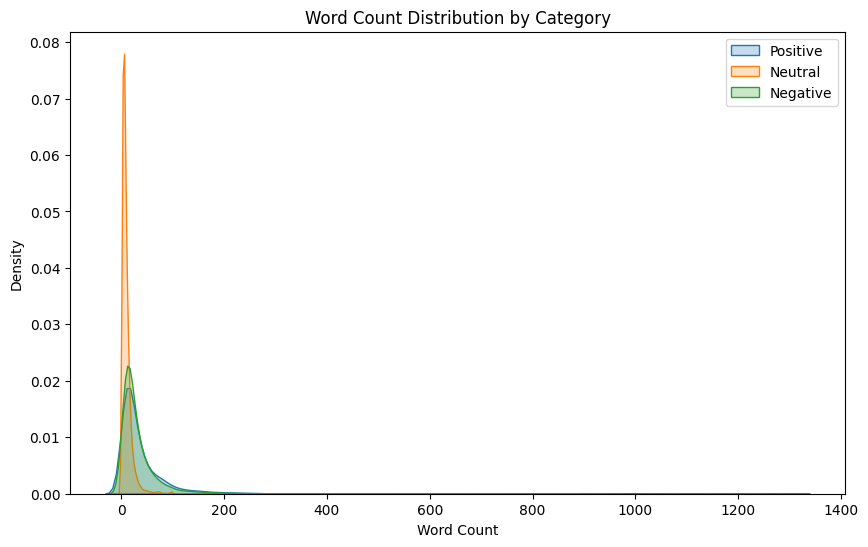

In [41]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Positive comments (category 1): These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.

Neutral comments (category 0): The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.

Negative comments (category -1): These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

Kernel Density Estimate (Density on Y-axis): A KDE plot is a smoothed representation of the data's distribution. Instead of showing counts, it estimates the probability density function (PDF) of the data. The y-axis values in a KDE plot represent the density of observations at a particular point. The key characteristic of a probability density function is that the total area under the curve integrates to 1.

<Axes: ylabel='word_count'>

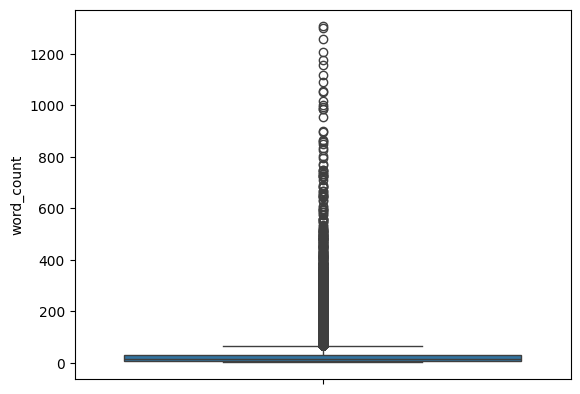

In [42]:
sns.boxplot(df['word_count'])

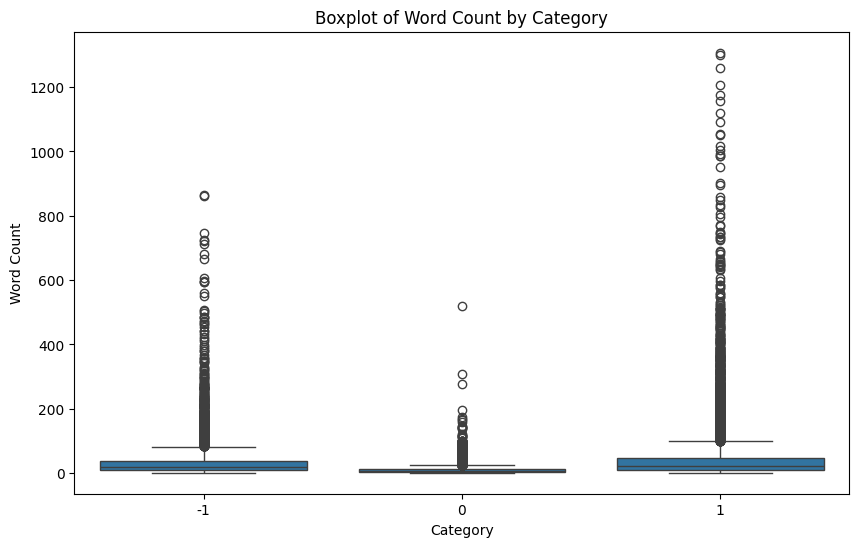

In [43]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

Positive comments (category 1): The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose.

Neutral comments (category 0): The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.

Negative comments (category -1): The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

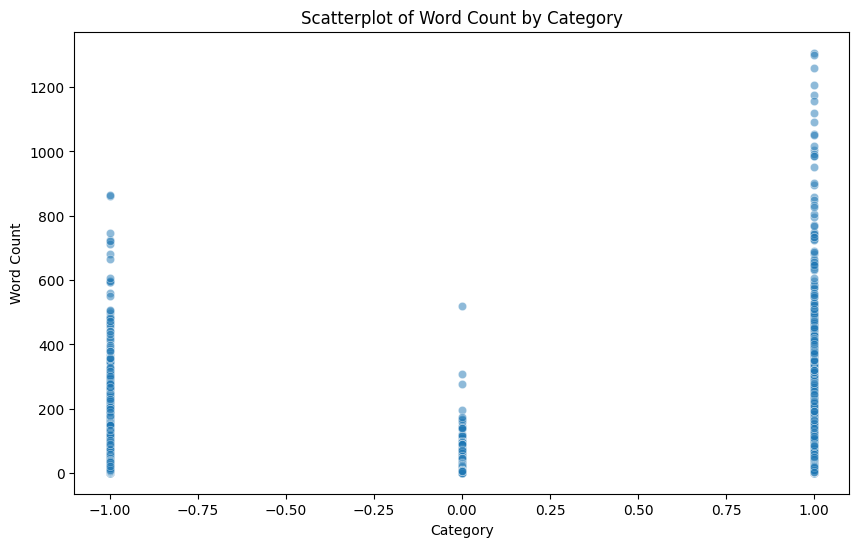

In [44]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

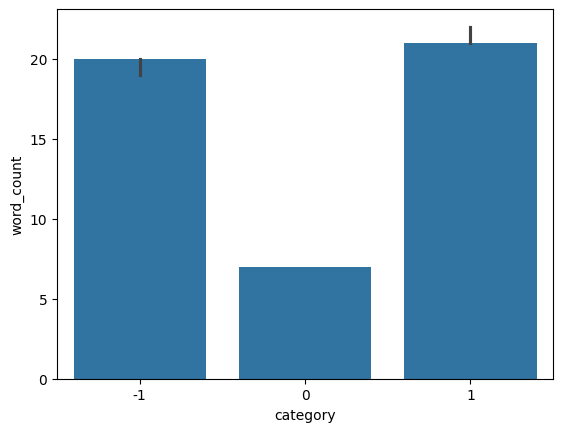

In [45]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

In [46]:
!pip install nltk

In [47]:

from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1.  **`from nltk.corpus import stopwords`**:
    * Imports the `stopwords` module from NLTK (Natural Language Toolkit), which contains lists of common words that are often filtered out in text processing (e.g., "a", "the", "is", "and").

2.  **`import nltk` and `nltk.download('stopwords')`**:
    * These lines ensure that the `stopwords` dataset, which NLTK uses, is downloaded to your system. You typically only need to run `nltk.download('stopwords')` once.

3.  **`stop_words = set(stopwords.words('english'))`**:
    * This creates a Python `set` containing all the standard English stop words provided by NLTK. Using a `set` is very efficient for checking if a word is present in the list.

4.  **`df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))`**:
    * `df['num_stop_words'] = ...`: This creates a new column in your DataFrame named `num_stop_words`.
    * `df['clean_comment'].apply(...)`: This applies a function (the `lambda` function) to each comment string in the `clean_comment` column.
    * `lambda x: ...`: This defines a small, anonymous function that operates on each comment (`x`).
    * `x.split()`: Inside the `lambda` function, this splits the comment string `x` into a list of individual words.
    * `[word for word in x.split() if word in stop_words]`: This is a list comprehension. It iterates through each `word` in the list created by `x.split()`. For each `word`, it checks if that `word` is present in the `stop_words` set. If it is, the word is included in a new temporary list.
    * `len([...])`: Finally, `len()` calculates the number of items (which are the stop words) in this temporary list. This count is then assigned to the `num_stop_words` column for that specific comment.

In summary, for every comment in your `clean_comment` column, this code counts how many of the predefined English stop words are present within it and stores that count in the new `num_stop_words` column.

In [49]:
df.sample(5)


,clean_comment,category,word_count,num_stop_words
19817,you guys make fun kulcha but love kulcha,1,8,2
19297,one many things that has been happening since ...,1,174,71
3328,omar abdullah deafeated pdp opponent sonawar h...,0,13,3
35663,all can say please don fail vote and vote wisely,1,10,4
34961,they will reply giving him 100 the votes,0,8,4


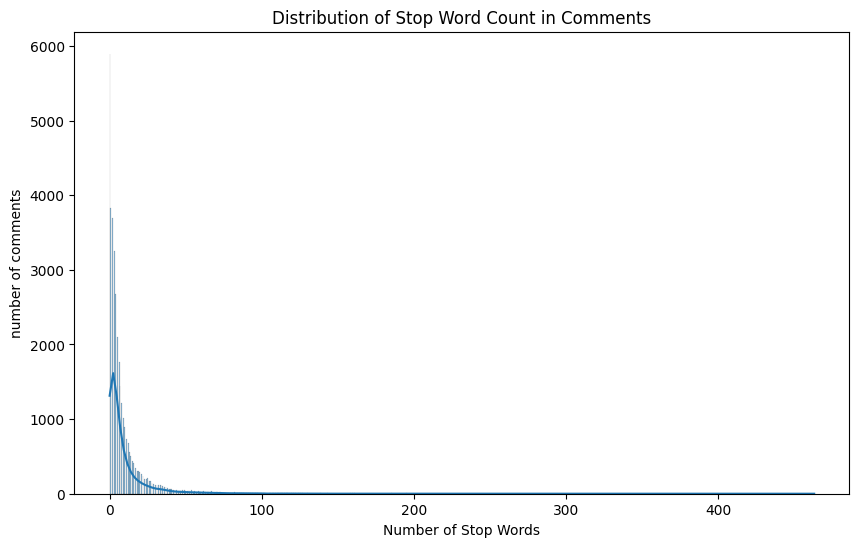

In [52]:

# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('number of comments')
plt.show()


1.  **Most Comments Have Few Stop Words:** The plot shows a very high frequency (count) for comments with a low number of stop words (close to 0 on the x-axis). This indicates that the vast majority of comments in your dataset are relatively short or concise, containing only a few common "filler" words.

2.  **Highly Skewed Distribution:** The distribution is heavily skewed to the right. This means that as the number of stop words increases, the frequency of comments with that many stop words drops off dramatically.

3.  **Longer Comments (with more stop words) are Rare:** While there's a long tail extending to the right (up to around 400-500 stop words), these instances are extremely rare. The frequency quickly approaches zero for comments with a higher number of stop words.

In summary, the plot tells us that your dataset is dominated by short comments, which naturally contain fewer stop words, and very long comments with many stop words are uncommon. This is a typical distribution for natural language text data.


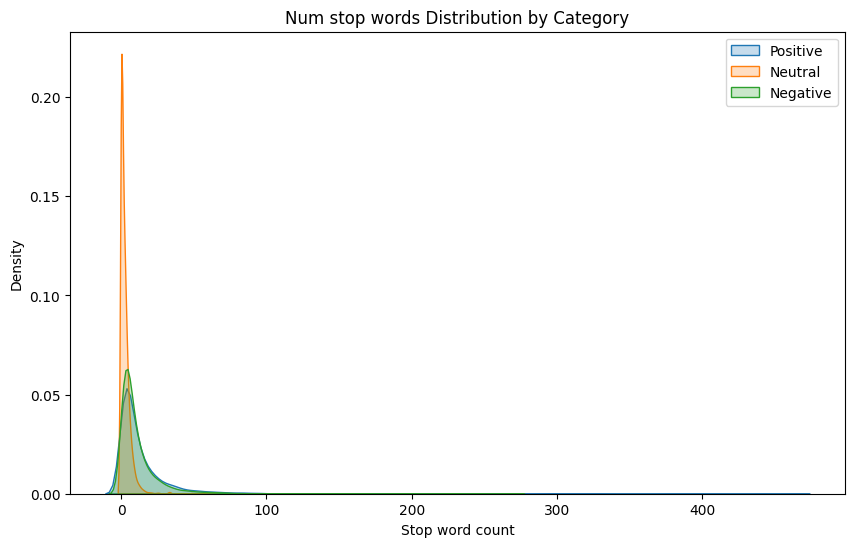

In [53]:

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()


U can see less stop word is present in neutral cateqory

<Axes: xlabel='category', ylabel='num_stop_words'>

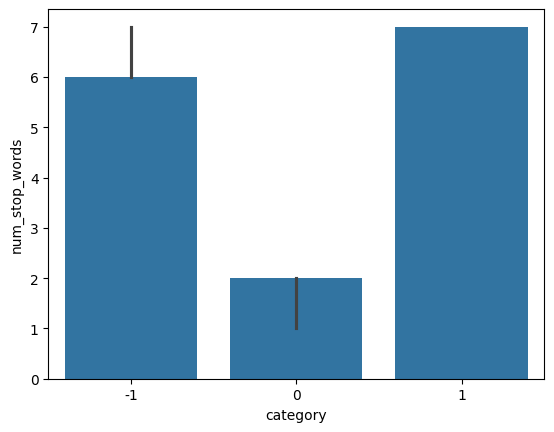

In [54]:
sns.barplot(df,x='category',y='num_stop_words',estimator='median')


**Y axis - average (mean) number of stop words per comment grouped by sentiment category**

Default Behavior of Bar Plots (especially in Seaborn): When you plot a numerical variable (like num_stop_words) against a categorical variable (like category) using functions like seaborn.barplot(), the default behavior is to calculate and display the mean of the numerical variable for each category.

/tmp/ipython-input-87103404.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


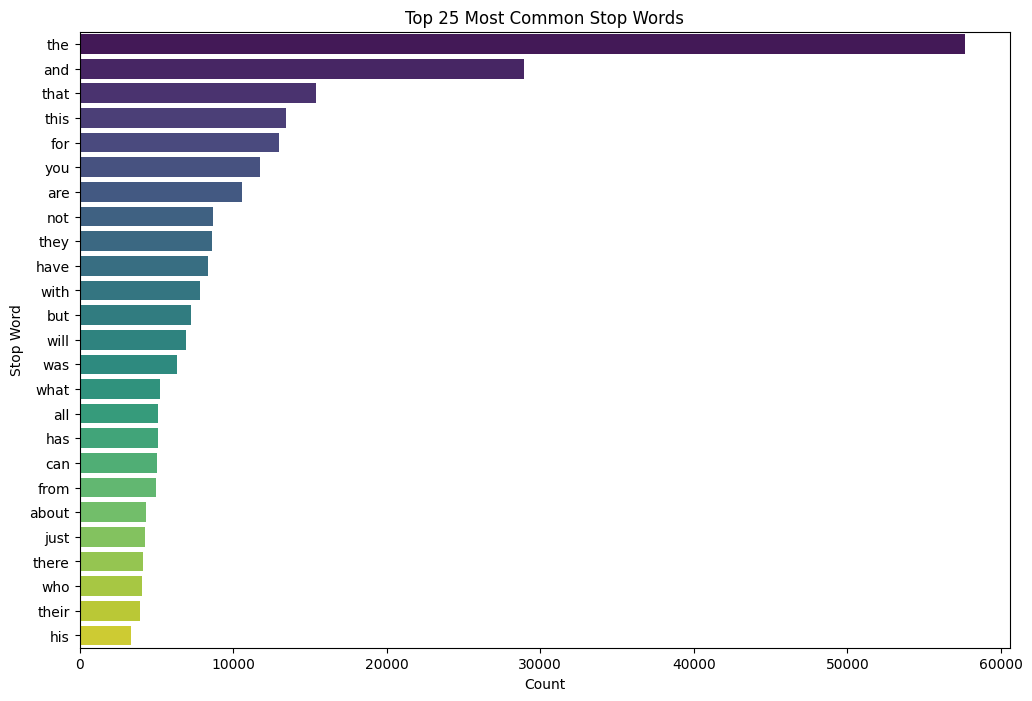

In [55]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

most_common_stop_words = Counter(all_stop_words).most_common(25):

Counter(all_stop_words): This counts how many times each unique stop word appears in the all_stop_words list.

.most_common(25): This method then picks out the 25 stop words that appeared the most frequently, along with their counts. The result is a list of tuples, e.g., [('the', 15000), ('a', 12000), ...].

top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count']):

This converts the list of top 25 stop words and their counts into a structured pandas DataFrame.

It names the columns appropriately: stop_word for the words themselves and count for their frequencies.

In [56]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [57]:
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [58]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)
print(char_frequency)
# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

Counter({' ': 1091592, 'e': 666610, 't': 491287, 'a': 481134, 'i': 401388, 'n': 388465, 'o': 379908, 's': 355279, 'r': 331425, 'h': 296748, 'l': 250104, 'd': 221980, 'u': 170377, 'c': 167821, 'm': 155561, 'p': 135139, 'g': 132927, 'y': 115420, 'w': 110522, 'b': 88199, 'f': 78866, 'v': 66020, 'k': 62531, 'j': 22906, 'x': 9075, '0': 8477, 'z': 5725, 'q': 5136, '1': 4845, '2': 4638, '’': 2314, '9': 1775, '5': 1631, '3': 1617, '4': 1573, '6': 1403, '7': 1291, '8': 1199, 'ा': 772, '“': 695, '”': 665, 'े': 519, '\\': 463, 'ी': 394, '@': 366, 'ं': 325, 'ो': 305, '्': 285, 'ė': 280, 'ि': 232, 'š': 227, 'ų': 211, '്': 188, '️': 180, 'ž': 171, '‘': 169, '—': 164, 'ै': 163, '±': 155, '–': 136, 'ą': 135, 'ु': 127, '，': 126, 'à': 114, 'ū': 110, '的': 109, 'č': 102, '।': 95, 'क': 91, 'ി': 90, '…': 81, 'त': 79, '。': 77, '\xa0': 76, 'į': 75, '₹': 71, '是': 68, 'ā': 67, 'ू': 66, 'ù': 65, 'र': 64, 'ò': 64, '☑': 63, 'é': 59, 'ു': 59, 'ാ': 56, '不': 53, 'स': 50, 'ँ': 49, '一': 46, 'न': 43, 'ə': 43, '了': 43, '

In [61]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], dtype=object)

In [62]:
char_frequency_df.head()

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388


In [63]:
char_frequency_df.tail(50)


,character,frequency
1286,货,1
1287,语,1
1312,耐,1
1313,精,1
342,━,1
345,⊂,1
346,゜,1
347,ｊ,1
1289,显,1
1291,鞋,1


In [65]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
1514,shit posts like this getting 100 upvotes good ...,1,30,8,192,0
5635,got paranoid wondering why was looking over le...,0,16,7,93,0
2158,the next swearing ceremony modi could convert ...,1,23,6,139,0
14053,man even their physiques match the stereotypes...,0,22,7,133,0
37000,don know ethical the first place make politica...,1,14,3,82,0


In [66]:
df['num_punctuation_chars'].describe()


,num_punctuation_chars
count,36793.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


bag_of_words (first 5 rows):
 <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 23 stored elements and shape (1, 474220)>
  Coords	Values
  (0, 8124)	1
  (0, 12676)	1
  (0, 55962)	1
  (0, 59671)	1
  (0, 77516)	1
  (0, 81581)	1
  (0, 95387)	1
  (0, 111015)	1
  (0, 134244)	1
  (0, 139622)	1
  (0, 144104)	1
  (0, 227396)	1
  (0, 242025)	1
  (0, 276779)	1
  (0, 290173)	1
  (0, 307699)	1
  (0, 338485)	1
  (0, 398642)	1
  (0, 403832)	1
  (0, 422534)	1
  (0, 427910)	1
  (0, 428385)	1
  (0, 434489)	1
sum_words (first 5 elements):
 [19  2  1  1  1]


/tmp/ipython-input-37537107.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


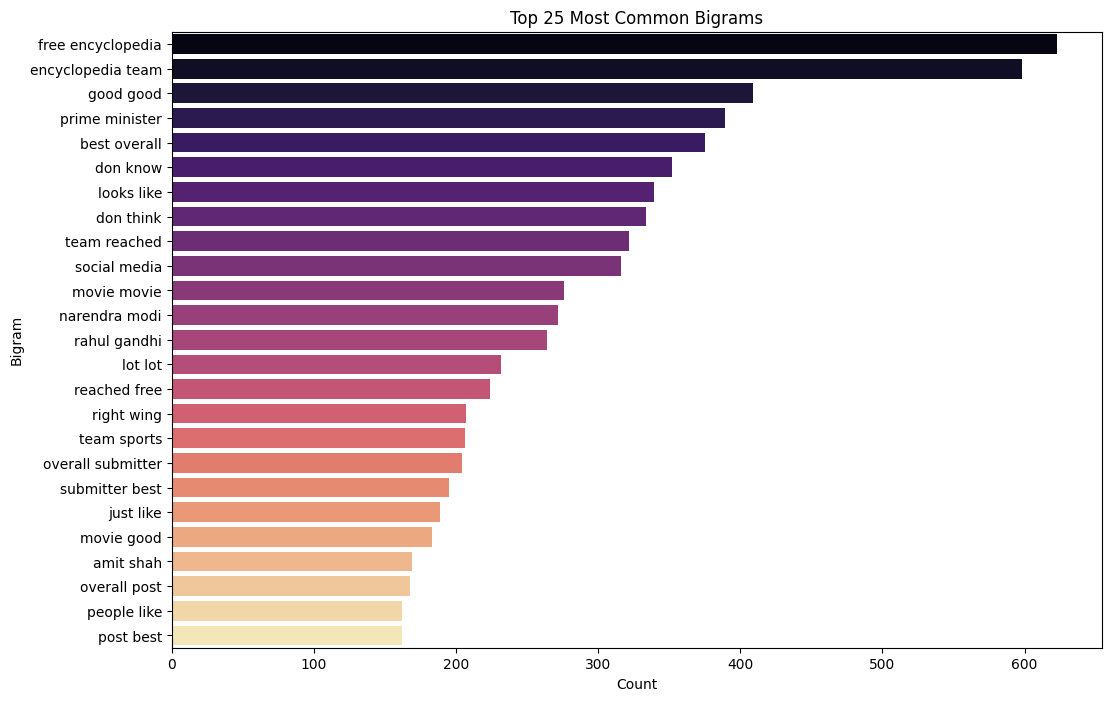

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    print('bag_of_words (first 5 rows):\n', bag_of_words[:1])
    sum_words = bag_of_words.sum(axis=0)
    print('sum_words (first 5 elements):\n', sum_words.A[0, :5])
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


Okay, let's use a super simple example to illustrate this.

Imagine you have only 3 comments:

**Corpus (your `df['clean_comment']`):**

1.  "i like apples"
2.  "i like oranges"
3.  "she likes apples"

Now, let's trace `bag_of_words` and `sum_words` for bigrams (`ngram_range=(2,2)`), ignoring stop words (though for this small example, let's assume `i` and `she` are stop words for simplicity, and thus removed).

After `vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)` and `bag_of_words = vec.transform(corpus)`:

Let's say `CountVectorizer` finds these unique bigrams (vocabulary):

  * Bigram 0: "like apples"
  * Bigram 1: "like oranges"
  * Bigram 2: "likes apples"

The **Full `bag_of_words` matrix** (before any printing) would conceptually look like this:

| Comment ID | "like apples" (Col 0) | "like oranges" (Col 1) | "likes apples" (Col 2) |
| :--------- | :-------------------- | :--------------------- | :--------------------- |
| 0          | 1                     | 0                      | 0                      |
| 1          | 0                     | 1                      | 0                      |
| 2          | 0                     | 0                      | 1                      |

(It's a sparse matrix, so it only stores the `1`s, not all the `0`s).

-----

Now, let's look at your code:

```python
bag_of_words = vec.transform(corpus) # This creates the FULL matrix above
print('bag_of_words (first 5 rows):\n', bag_of_words[:1]) # This prints only the first row
sum_words = bag_of_words.sum(axis=0) # This calculates the sum
```

**What the `print` statement for `bag_of_words[:1]` would show:**

It would look something like this, because it's only looking at the data for "Comment 0":

```
bag_of_words (first 5 rows):
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1 stored elements and shape (1, 3)>  # Shape is (1 row, 3 unique bigrams)
  Coords	Values
  (0, 0)	1  # In comment 0, bigram 0 ("like apples") appeared once
```

Notice it's only showing the first comment's data.

-----

**How `sum_words` is calculated:**

Even though the `print` statement only showed you the first row, the `bag_of_words` variable *still holds the full matrix* (all 3 comments in our example).

When `sum_words = bag_of_words.sum(axis=0)` is executed:

It performs the sum **column by column** across **all rows of the full `bag_of_words` matrix**:

  * **For "like apples" (Column 0):** `1 (from Comment 0) + 0 (from Comment 1) + 0 (from Comment 2) = 1`
  * **For "like oranges" (Column 1):** `0 (from Comment 0) + 1 (from Comment 1) + 0 (from Comment 2) = 1`
  * **For "likes apples" (Column 2):** `0 (from Comment 0) + 0 (from Comment 1) + 1 (from Comment 2) = 1`

So, `sum_words` would be `[1, 1, 1]` in this simplified example.

-----

**Connecting to your actual output:**

Your `bag_of_words (first 5 rows)` output (with shape `(1, 474220)`) showed you just the bigrams present in your very first actual comment.

However, your `sum_words` output `[19 2 1 1 1]` represents the **total counts for the first 5 bigrams across *all tens of thousands of comments* in your dataset**, because the `.sum(axis=0)` operation used the complete `bag_of_words` matrix before any visual slicing for printing happened.

Okay, let's explain the final part of that `get_top_ngrams` function step by step:

1.  **`words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]`**

    * **What `vec.vocabulary_.items()` is:** After `CountVectorizer` reads all your comments (`.fit(corpus)`), it builds an internal dictionary (its "vocabulary"). This dictionary maps each unique bigram (e.g., "thank you", "feel good") to a unique numerical index. So, `vec.vocabulary_.items()` gives you pairs like `('thank you', 0)`, `('feel good', 1)`, `('another example', 2)`, and so on, for all 474,220 unique bigrams it found.
    * **What `sum_words[0, idx]` is:** As we just discussed, `sum_words` holds the *total count* for every single unique bigram across *all* your comments. `idx` is the numerical index for a specific bigram. So, `sum_words[0, idx]` simply retrieves the total count for the bigram that has that `idx`.
    * **`for word, idx in ...`:** This part loops through every bigram and its index from the `vec.vocabulary_`.
    * **`(word, sum_words[0, idx])`:** For each bigram, it creates a pair (a tuple) containing the actual bigram text (like "thank you") and its total count.
    * **`[...]` (List Comprehension):** This all happens in a very compact way to build a new list.

    **In simple terms:** This line creates a list where each item is a pair: `( "the actual bigram phrase", its total count across all comments )`. It does this for *every single unique bigram* found in your data.

2.  **`words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)`**

    * **`sorted(words_freq, ...)`:** This takes the `words_freq` list (the one you just created with `(bigram, count)` pairs) and sorts it.
    * **`key=lambda x: x[1]`:** This is the most important part for sorting. It tells Python: "When sorting each pair (`x`), look at its *second item* (`x[1]`), which is the count. Use that count to decide the order."
    * **`reverse=True`:** This tells Python: "Sort in descending order." So, the biggest counts will come first.

    **In simple terms:** This line arranges the list of bigrams and their counts from the **most frequently occurring bigram down to the least frequently occurring bigram**.

3.  **`return words_freq[:n]`**

    * **`words_freq[:n]`:** This is called "list slicing." It takes the `words_freq` list (which is now sorted from most to least frequent) and selects only the elements from the beginning of the list up to, but not including, the `n`-th element.
    * Since your code calls `get_top_ngrams(df['clean_comment'], 25)`, `n` will be `25`.

    **In simple terms:** This line returns **only the very top `n` (e.g., 25) most common bigrams and their counts**. These are the ones you want to plot.

---

**Putting it all together for these three lines:**

These lines take all the bigrams discovered from your comments, count their total occurrences, sort them from most common to least common, and then give you back just the top 25 (or whatever number `n` you specify) of those bigrams with their counts.

The `0` in `sum_words[0, idx]` refers to the **row index** of the `sum_words` matrix.

Here's why it's `0`:

1.  **`sum_words`'s Shape:** When you calculate `sum_words = bag_of_words.sum(axis=0)`, the result is a matrix (specifically, a sparse matrix) that has **only one row**. This row contains the total count for each unique bigram across all your comments. Its shape would be `(1, total_unique_bigrams)`.

2.  **Indexing Matrices:** To access an element in a 2-dimensional matrix, you usually need to specify both a row index and a column index, like `matrix[row_index, column_index]`.

3.  **Accessing the Single Row:** Since `sum_words` only has one row, that row is always at index `0`. So, to get a specific bigram's total count, you look in the `0`th row at the column corresponding to that bigram's index (`idx`).

So, `sum_words[0, idx]` means: "Go to the **first row** (index 0) of the `sum_words` matrix, and then get the value at the column specified by `idx`."

/tmp/ipython-input-1870316187.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


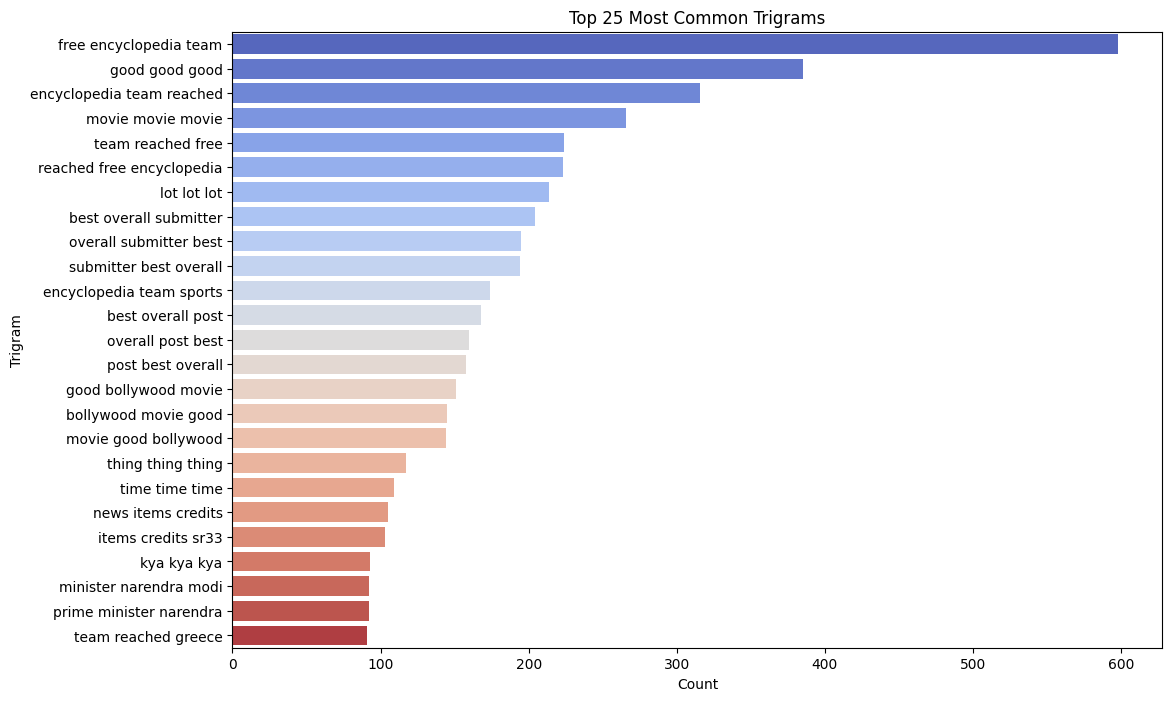

In [72]:
   # Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()


In [73]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))
#ine iterates through every single comment in your clean_comment column. For each comment,
#it removes any characters that are not letters, numbers, spaces, exclamation marks, question marks, periods, or commas.


all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df


,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [74]:
df.head()


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [76]:

from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)


In [77]:
df.head()


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [79]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


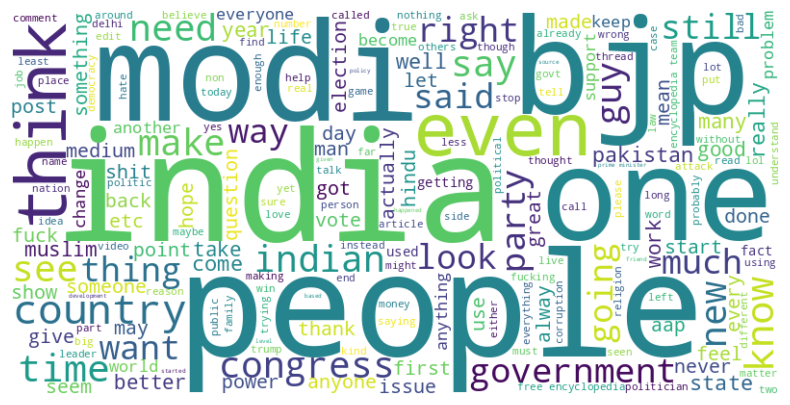

In [80]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

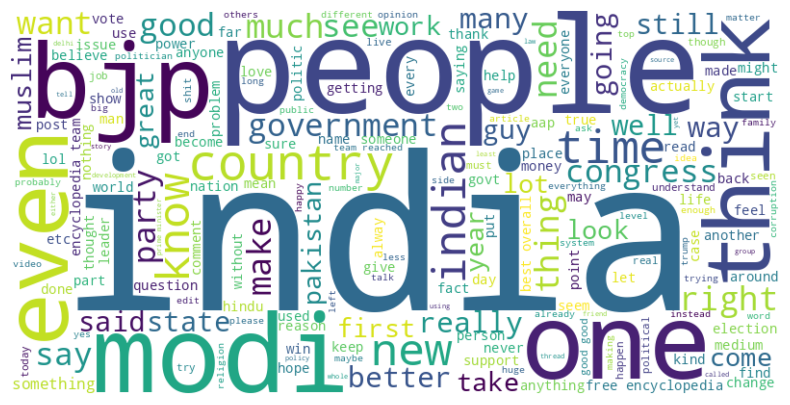

In [81]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

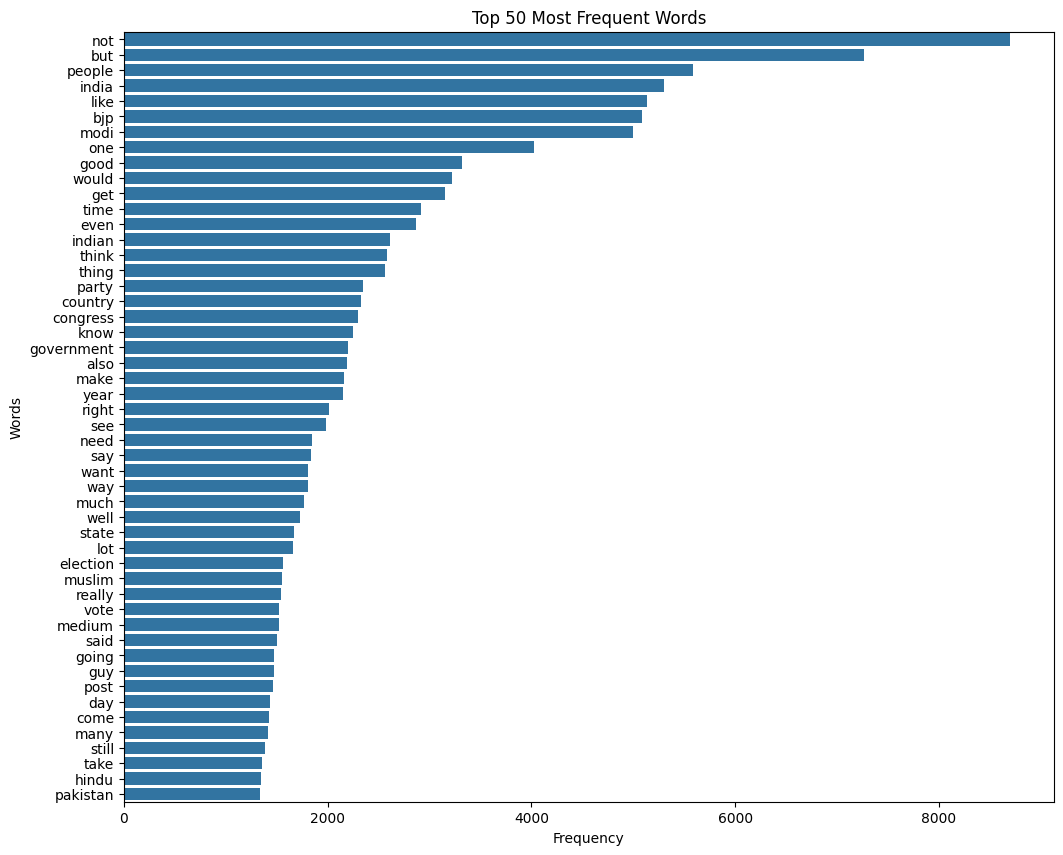

In [84]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(12,10))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)

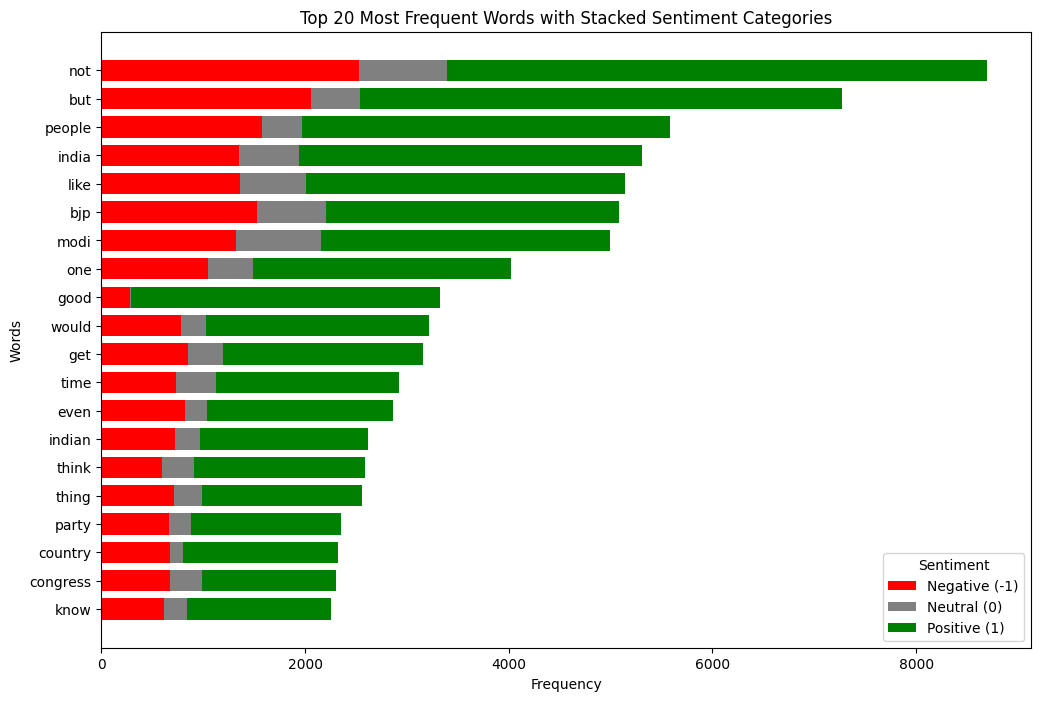

In [85]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)
